# World Economic Classifications


### In this lesson, we will analyze and classify the World Economies

<a href='https://www.kaggle.com/datasets/jeanetteponder/world-economic-classifications/data' target=_blank>You can find the data file here</a>

<img src=https://gmk.center/wp-content/uploads/2023/09/shutterstock_2154195865-1.png width='400'>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",181)
pd.set_option("display.max_rows",None)

In [2]:
df=pd.read_csv('World Economic Classifications v2.csv')

In [3]:
df.head(5)

,country_name,un_class_2014,imf_class_2023,g7,eu_member,fuel_exp_country,wealth_rank,gdp_ppp_2022,gdp_pc_2022
0,Luxembourg,Developed,Advanced,No,Yes,No,1.0,"$142,214.00","$127,046.00"
1,Singapore,Developing,Advanced,No,No,No,2.0,"$127,565.00","$78,115.00"
2,Ireland,Developed,Advanced,No,Yes,No,3.0,"$126,905.00","$105,362.00"
3,Norway,Developed,Advanced,No,No,No,4.0,"$114,899.00","$106,594.00"
4,Qatar,Developing,Emerging,No,No,Yes,5.0,"$114,648.00","$88,046.00"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_name      205 non-null    object 
 1   un_class_2014     167 non-null    object 
 2   imf_class_2023    193 non-null    object 
 3   g7                205 non-null    object 
 4   eu_member         205 non-null    object 
 5   fuel_exp_country  205 non-null    object 
 6   wealth_rank       178 non-null    float64
 7   gdp_ppp_2022      175 non-null    object 
 8   gdp_pc_2022       176 non-null    object 
dtypes: float64(1), object(8)
memory usage: 14.5+ KB


In [5]:
df.isnull().sum()

country_name         0
un_class_2014       38
imf_class_2023      12
g7                   0
eu_member            0
fuel_exp_country     0
wealth_rank         27
gdp_ppp_2022        30
gdp_pc_2022         29
dtype: int64

In [6]:
df['gdp_ppp_2022'] = df['gdp_ppp_2022'].str.replace('$', '')
df['gdp_ppp_2022'] = df['gdp_ppp_2022'].str.replace(',', '').astype(float)
df['gdp_pc_2022'] = df['gdp_pc_2022'].str.replace('$', '')
df['gdp_pc_2022'] = df['gdp_pc_2022'].str.replace(',', '').astype(float)
# we removed the dollar and comma wasters in these columns and converted them to float

In [7]:
df.shape

(205, 9)

In [8]:
df['gdp_ppp_2022'].value_counts()

gdp_ppp_2022
142214.0    1
7395.0      1
10782.0     1
10133.0     1
9684.0      1
9533.0      1
9519.0      1
9384.0      1
9083.0      1
8379.0      1
7228.0      1
10862.0     1
6974.0      1
6875.0      1
6757.0      1
6741.0      1
6538.0      1
6498.0      1
6437.0      1
6424.0      1
10818.0     1
11003.0     1
6041.0      1
14125.0     1
15977.0     1
15905.0     1
15238.0     1
15091.0     1
15048.0     1
14653.0     1
14405.0     1
14230.0     1
13573.0     1
11096.0     1
13457.0     1
13210.0     1
12822.0     1
12671.0     1
12490.0     1
11822.0     1
11451.0     1
11206.0     1
6133.0      1
5860.0      1
16987.0     1
2190.0      1
2694.0      1
2654.0      1
2608.0      1
2546.0      1
2531.0      1
2517.0      1
2510.0      1
2365.0      1
1931.0      1
2792.0      1
1774.0      1
1732.0      1
1725.0      1
1668.0      1
1505.0      1
1468.0      1
1337.0      1
967.0       1
2695.0      1
2812.0      1
5764.0      1
4216.0      1
5421.0      1
4885.0      1
4870.0 

In [9]:
df = df.dropna(subset=['gdp_ppp_2022']) #we deleted the empty data in this column

In [10]:
x=df[['gdp_ppp_2022','gdp_pc_2022']]

In [11]:
df.head()

,country_name,un_class_2014,imf_class_2023,g7,eu_member,fuel_exp_country,wealth_rank,gdp_ppp_2022,gdp_pc_2022
0,Luxembourg,Developed,Advanced,No,Yes,No,1.0,142214.0,127046.0
1,Singapore,Developing,Advanced,No,No,No,2.0,127565.0,78115.0
2,Ireland,Developed,Advanced,No,Yes,No,3.0,126905.0,105362.0
3,Norway,Developed,Advanced,No,No,No,4.0,114899.0,106594.0
4,Qatar,Developing,Emerging,No,No,Yes,5.0,114648.0,88046.0


## First of all, we will ask them to divide into 3 groups

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
model=KMeans(3)

In [14]:
model.fit(x)

KMeans(n_clusters=3)

In [15]:
model=model.fit(x)

In [16]:
tahmin=model.predict(x)

In [17]:
tahmin

array([2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [18]:
df['cluster']=tahmin

In [19]:
df.head(200) 

,country_name,un_class_2014,imf_class_2023,g7,eu_member,fuel_exp_country,wealth_rank,gdp_ppp_2022,gdp_pc_2022,cluster
0,Luxembourg,Developed,Advanced,No,Yes,No,1.0,142214.0,127046.0,2
1,Singapore,Developing,Advanced,No,No,No,2.0,127565.0,78115.0,2
2,Ireland,Developed,Advanced,No,Yes,No,3.0,126905.0,105362.0,2
3,Norway,Developed,Advanced,No,No,No,4.0,114899.0,106594.0,2
4,Qatar,Developing,Emerging,No,No,Yes,5.0,114648.0,88046.0,2
5,United Arab Emirates (UAE),Transition,Advanced,No,No,Yes,6.0,87729.0,53758.0,1
6,Switzerland,Developed,Advanced,No,No,No,7.0,83598.0,92410.0,2
7,United States,Developed,Advanced,Yes,No,No,8.0,76399.0,75269.0,1
8,Denmark,Developed,Advanced,No,Yes,No,9.0,74005.0,67220.0,1
9,Netherlands,Developed,Advanced,No,Yes,No,10.0,69577.0,56429.0,1



## Country rankings and whether they are developed or not do not depend solely on gdp_ppp_2022 and gdp_pc_2022 values, now we will cluster from the most appropriate place with the Elbow method

In [20]:
wcss=[]
ss=[]
for i in range(2,14):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.6904167891286138
0.6771349009749951
0.6414420286419318
0.5592656668662868
0.5421060544982085
0.5447282938845193
0.5173372836240833
0.5188406789336392
0.5131664288534137
0.5016626567652372
0.492460694733846
0.48863149421195806


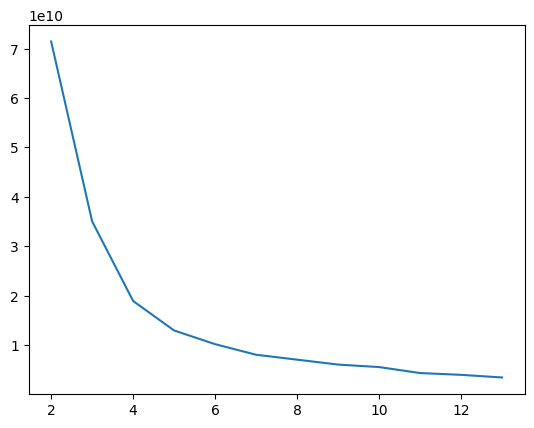

In [21]:
plt.plot(range(2,14),wcss)

In [22]:
from yellowbrick.cluster import KElbowVisualizer

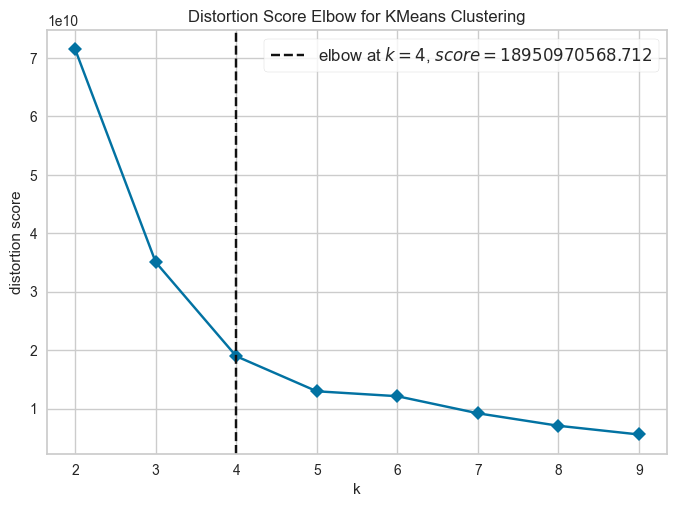

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

visualizer.fit(x)  
visualizer.show()

In [24]:
silhouette_score(x,tahmin)

0.48863149421195806

In [25]:
model=KMeans(4)

In [26]:
model.fit(x)

KMeans(n_clusters=4)

In [27]:
model=model.fit(x)

In [28]:
tahmin=model.predict(x)

In [29]:
tahmin

array([1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [30]:
df['cluster']=tahmin

In [31]:
df.head(5)

,country_name,un_class_2014,imf_class_2023,g7,eu_member,fuel_exp_country,wealth_rank,gdp_ppp_2022,gdp_pc_2022,cluster
0,Luxembourg,Developed,Advanced,No,Yes,No,1.0,142214.0,127046.0,1
1,Singapore,Developing,Advanced,No,No,No,2.0,127565.0,78115.0,1
2,Ireland,Developed,Advanced,No,Yes,No,3.0,126905.0,105362.0,1
3,Norway,Developed,Advanced,No,No,No,4.0,114899.0,106594.0,1
4,Qatar,Developing,Emerging,No,No,Yes,5.0,114648.0,88046.0,1


In [32]:
df['cluster'].value_counts()

cluster
0    113
3     37
2     19
1      6
Name: count, dtype: int64

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [34]:
data=linkage(x, method='ward', metric='euclidean')

In [35]:
plt.figure(figsize=(25,6))

<Figure size 2500x600 with 0 Axes>

<Figure size 2500x600 with 0 Axes>

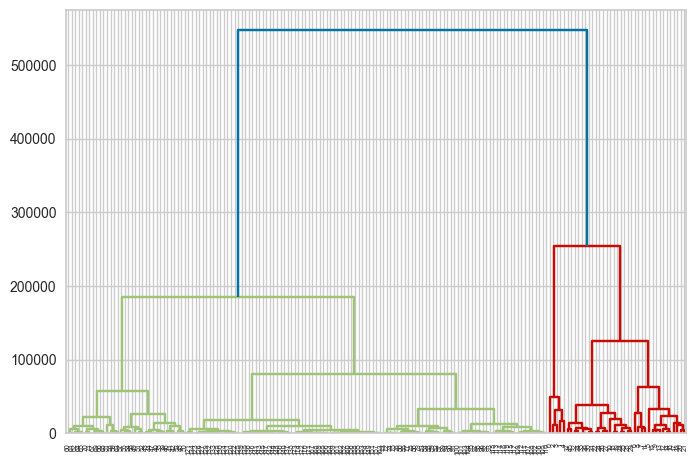

In [36]:
dendrogram(data);

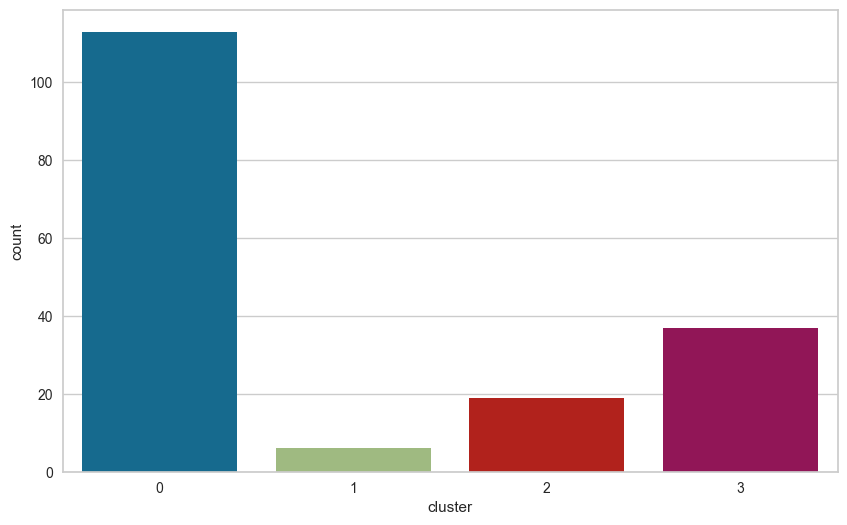

In [37]:
plt.figure(figsize=(10, 6)) 
sns.countplot(x=df['cluster'])
plt.show()

Text(0, 0.5, 'gdp_pc_2022')

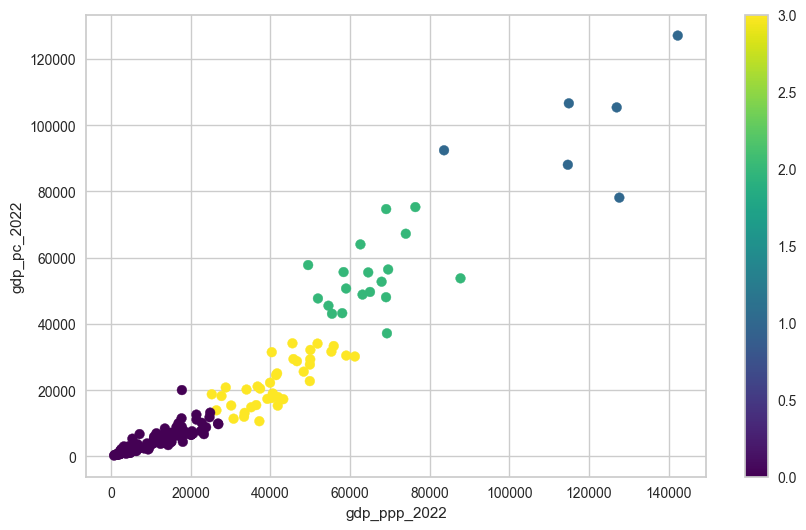

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(df.gdp_ppp_2022,df.gdp_pc_2022, c=tahmin, cmap='viridis')
plt.colorbar()
plt.xlabel('gdp_ppp_2022')
plt.ylabel('gdp_pc_2022')

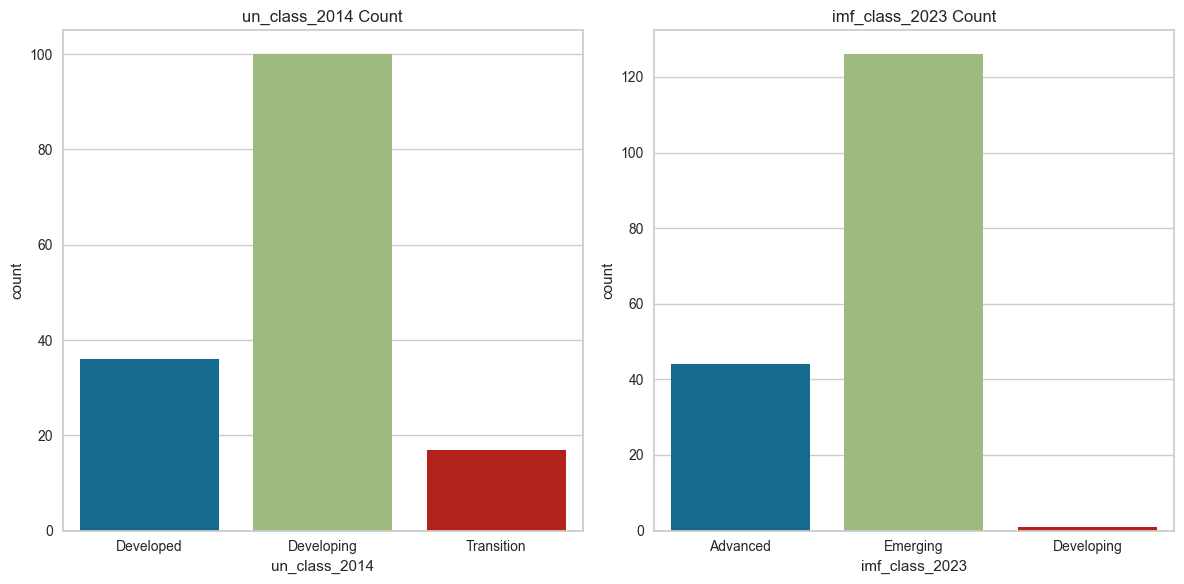

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x=df['un_class_2014'], ax=axes[0])
axes[0].set_title('un_class_2014 Count')

sns.countplot(x=df['imf_class_2023'], ax=axes[1])
axes[1].set_title('imf_class_2023 Count')

plt.tight_layout()

plt.show()

# When we divide the data into 4 groups, we see that there are many more countries with low welfare levels in the world